<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Marco Roco Arias </h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 
 

## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    

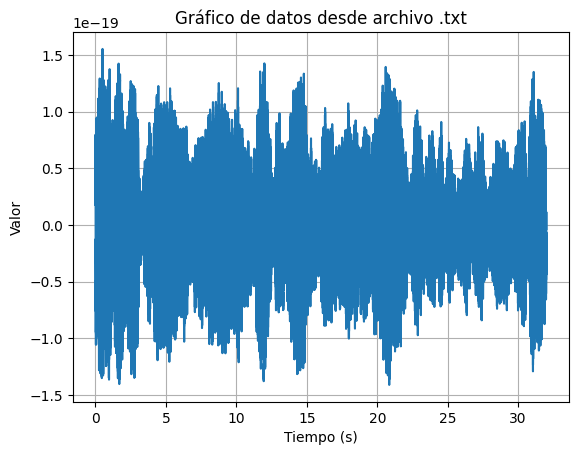

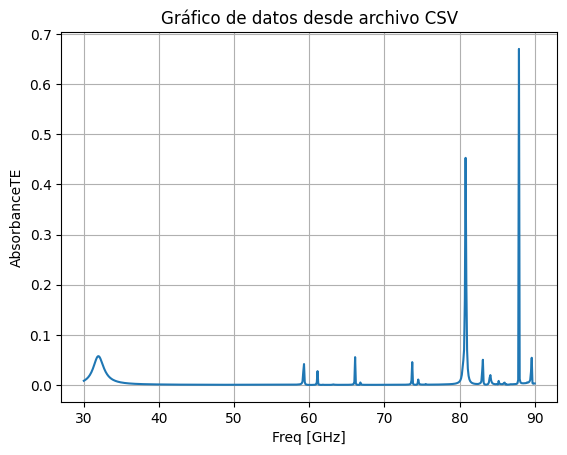

In [31]:
import matplotlib.pyplot as plt

# 1. Cargar el archivo de texto y adquirir los datos
with open('H-H1_GWOSC_16KHZ_R1-1268431079-32.txt', 'r') as file:
    # Leer las primeras tres líneas (instrucciones) y almacenarlas en una lista
    instructions = [file.readline().strip() for _ in range(3)]

    # Leer los datos restantes y convertirlos a números
    datos = [float(linea.strip()) for linea in file]

# 2. Procesar los datos (en este caso, no necesitamos procesamiento adicional)
duration = 32  # Duración en segundos
# Crear una lista de tiempo basada en la duración y el número de puntos de datos
time = [i * duration / len(datos) for i in range(len(datos))]

# 3. Graficar los datos
plt.plot(time, datos)
plt.title('Gráfico de datos desde archivo .txt')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


import pandas as pd

# 1. Cargar el archivo CSV y adquirir los datos
df = pd.read_csv('AbsorbanceTE_0-0.csv')

# Extraer datos de las columnas x e y
x = df['Freq [GHz]']
y = df['AbsorbanceTE ']

# 2. Procesar los datos (en este caso, no necesitamos procesamiento adicional)

# 3. Graficar los datos
plt.plot(x, y, linestyle='-')
plt.title('Gráfico de datos desde archivo CSV')
plt.xlabel('Freq [GHz]')
plt.ylabel('AbsorbanceTE')
plt.grid(True)
plt.show()


## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


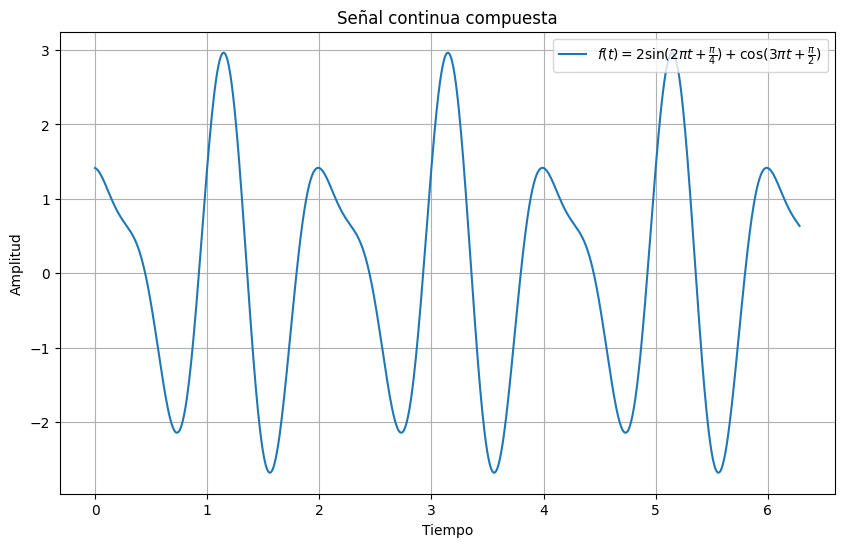

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
A1 = 2
A2 = 1
omega1 = 2 * np.pi
omega2 = 3 * np.pi
phi1 = np.pi / 4
phi2 = np.pi / 2

# Definir el dominio temporal
t = np.linspace(0, 2*np.pi, 1000)

# Calcular la señal
signal = A1 * np.sin(omega1 * t + phi1) + A2 * np.cos(omega2 * t + phi2)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label=r'$f(t) = 2 \sin(2\pi t + \frac{\pi}{4}) + \cos(3\pi t + \frac{\pi}{2})$')
plt.title('Señal continua compuesta')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

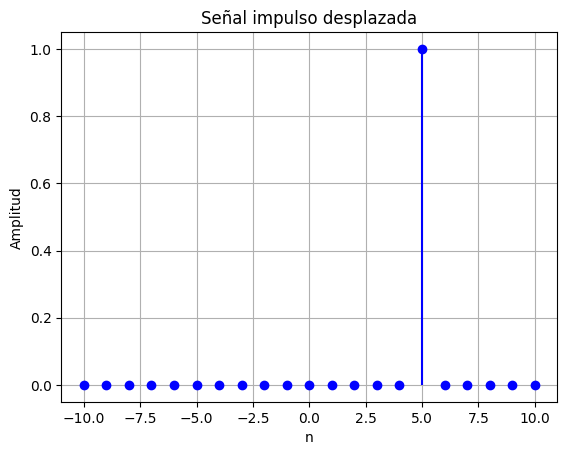

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una señal impulso (delta)
def impulso(n, desplazamiento=0):
    impulso = np.zeros_like(n)
    impulso[n == desplazamiento] = 1
    return impulso

# Definir el intervalo de tiempo
n = np.arange(-10, 11)

# Desplazar la señal impulso
desplazamiento = 5
impulso_desplazado = impulso(n, desplazamiento)

# Graficar la señal original y la señal desplazada
plt.stem(n, impulso_desplazado, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.title('Señal impulso desplazada')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

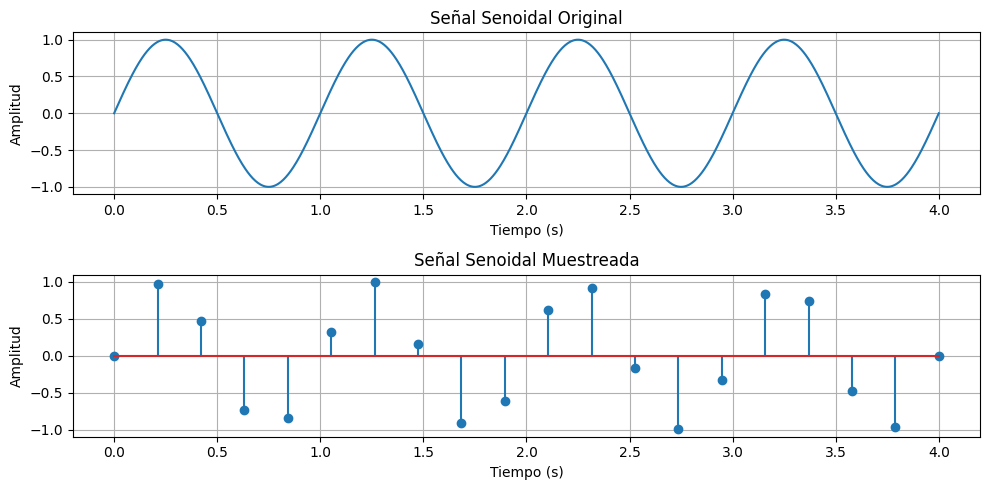

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal senoidal
amplitud = 1.0  # Amplitud de la señal
frecuencia = 1.0  # Frecuencia en Hz
fase = 0.0  # Fase en radianes
muestras = 1000  # Número de muestras
tiempo_final = 4  # Tiempo final en segundos

# Generación de la señal senoidal original
tiempo_original = np.linspace(0, tiempo_final, muestras)  # Vector de tiempo para la señal original
senal_original = amplitud * np.sin(2 * np.pi * frecuencia * tiempo_original + fase)  # Señal senoidal original

# Frecuencia de muestreo
frecuencia_muestreo = 5 * frecuencia  # Al menos el doble de la frecuencia máxima

# Número de muestras para la señal muestreada
muestras_muestreo = int(tiempo_final * frecuencia_muestreo)

# Muestreo de la señal original
tiempo_muestreo = np.linspace(0, tiempo_final, muestras_muestreo)
senal_muestreada = amplitud * np.sin(2 * np.pi * frecuencia * tiempo_muestreo + fase)

# Visualización de la señal original y la señal muestreada
plt.figure(figsize=(10, 5))

# Señal original
plt.subplot(2, 1, 1)
plt.plot(tiempo_original, senal_original)
plt.title('Señal Senoidal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal muestreada
plt.subplot(2, 1, 2)
plt.stem(tiempo_muestreo, senal_muestreada)
plt.title('Señal Senoidal Muestreada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()





### 3.3 Genere una señal Triangular y realice la operación de sampleo

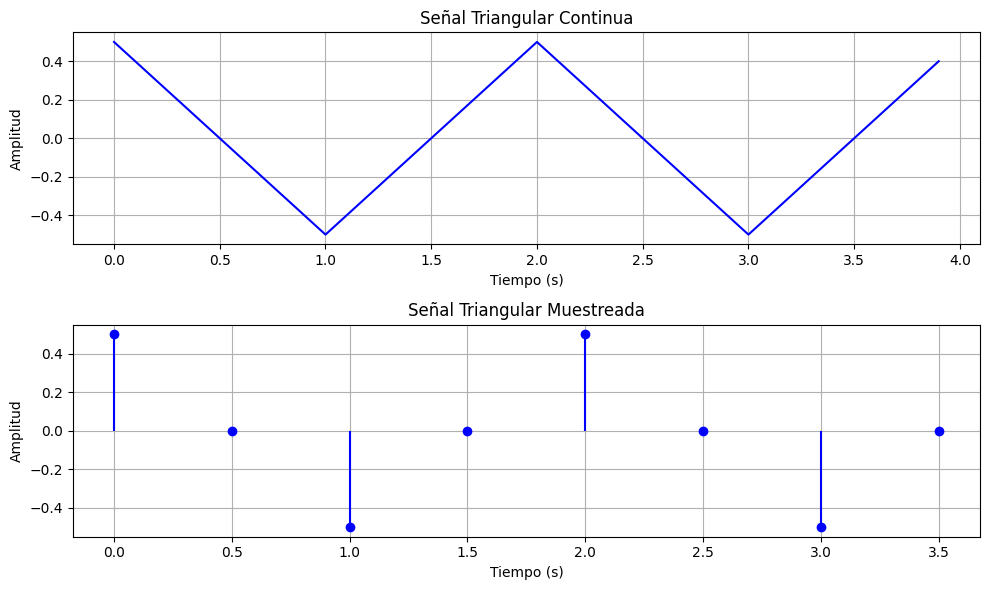

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal triangular
amplitud = 1.0
periodo = 2.0  # Segundos
duracion = 4.0  # Segundos
periodo_muestreo = 0.1  # Segundos
factor_muestreo = 5  # Factor de muestreo

# Tiempo continuo
t_continuo = np.arange(0, duracion, periodo_muestreo)

# Señal triangular continua
senal_continua = amplitud * np.abs((t_continuo % periodo) - periodo / 2) - amplitud / 2

# Muestreo de la señal triangular
t_muestreo = t_continuo[::factor_muestreo]
senal_muestreada = senal_continua[::factor_muestreo]

# Graficar la señal triangular continua y muestreada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t_continuo, senal_continua, 'b-')
plt.title('Señal Triangular Continua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(t_muestreo, senal_muestreada, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.title('Señal Triangular Muestreada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

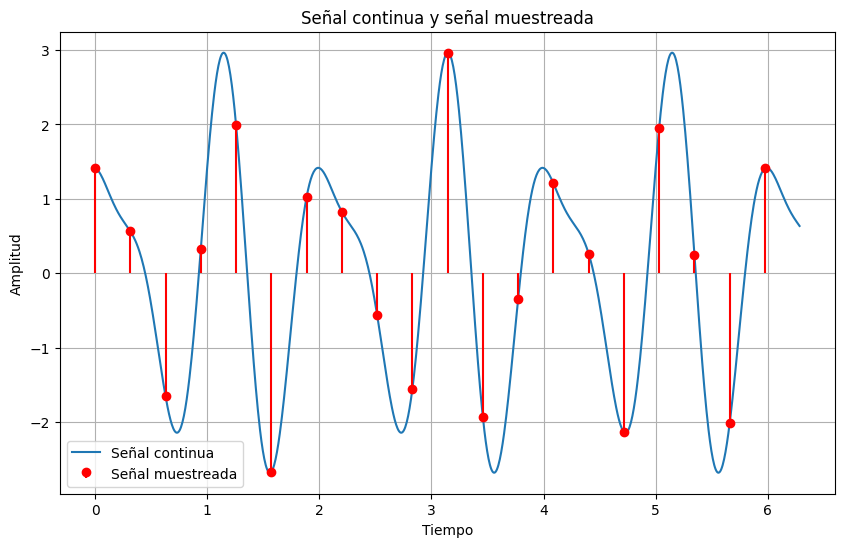

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
A1 = 2
A2 = 1
omega1 = 2 * np.pi
omega2 = 3 * np.pi
phi1 = np.pi / 4
phi2 = np.pi / 2

# Definir el dominio temporal
t = np.linspace(0, 2*np.pi, 1000)

# Calcular la señal continua
signal_continua = A1 * np.sin(omega1 * t + phi1) + A2 * np.cos(omega2 * t + phi2)

# Parámetros de muestreo
factor_muestreo = 50  # Factor de muestreo
t_muestreo = t[::factor_muestreo]
signal_muestreada = signal_continua[::factor_muestreo]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(t, signal_continua, label='Señal continua')
plt.stem(t_muestreo, signal_muestreada, linefmt='r-', markerfmt='ro', basefmt=' ', label='Señal muestreada')
plt.title('Señal continua y señal muestreada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax. 

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

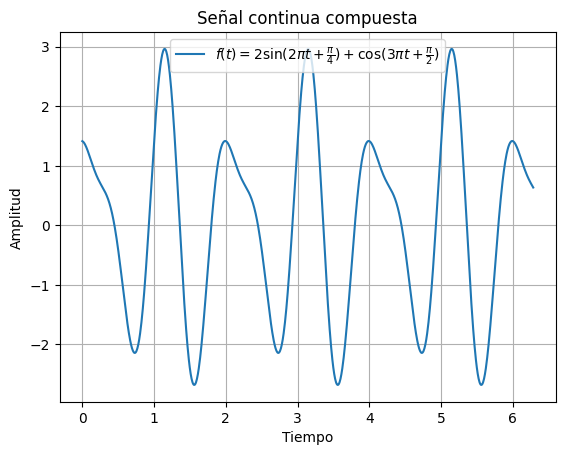

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros de la señal original
A1 = 2
A2 = 1
omega1 = 2 * np.pi
omega2 = 3 * np.pi
phi1 = np.pi / 4
phi2 = np.pi / 2

# Definir el dominio temporal de la señal original
t = np.linspace(0, 2*np.pi, 1000)

# Calcular la señal original
signal = A1 * np.sin(omega1 * t + phi1) + A2 * np.cos(omega2 * t + phi2)

# Gráfico de la señal original
plt.plot(t, signal, label=r'$f(t) = 2 \sin(2\pi t + \frac{\pi}{4}) + \cos(3\pi t + \frac{\pi}{2})$')
plt.title('Señal continua compuesta')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

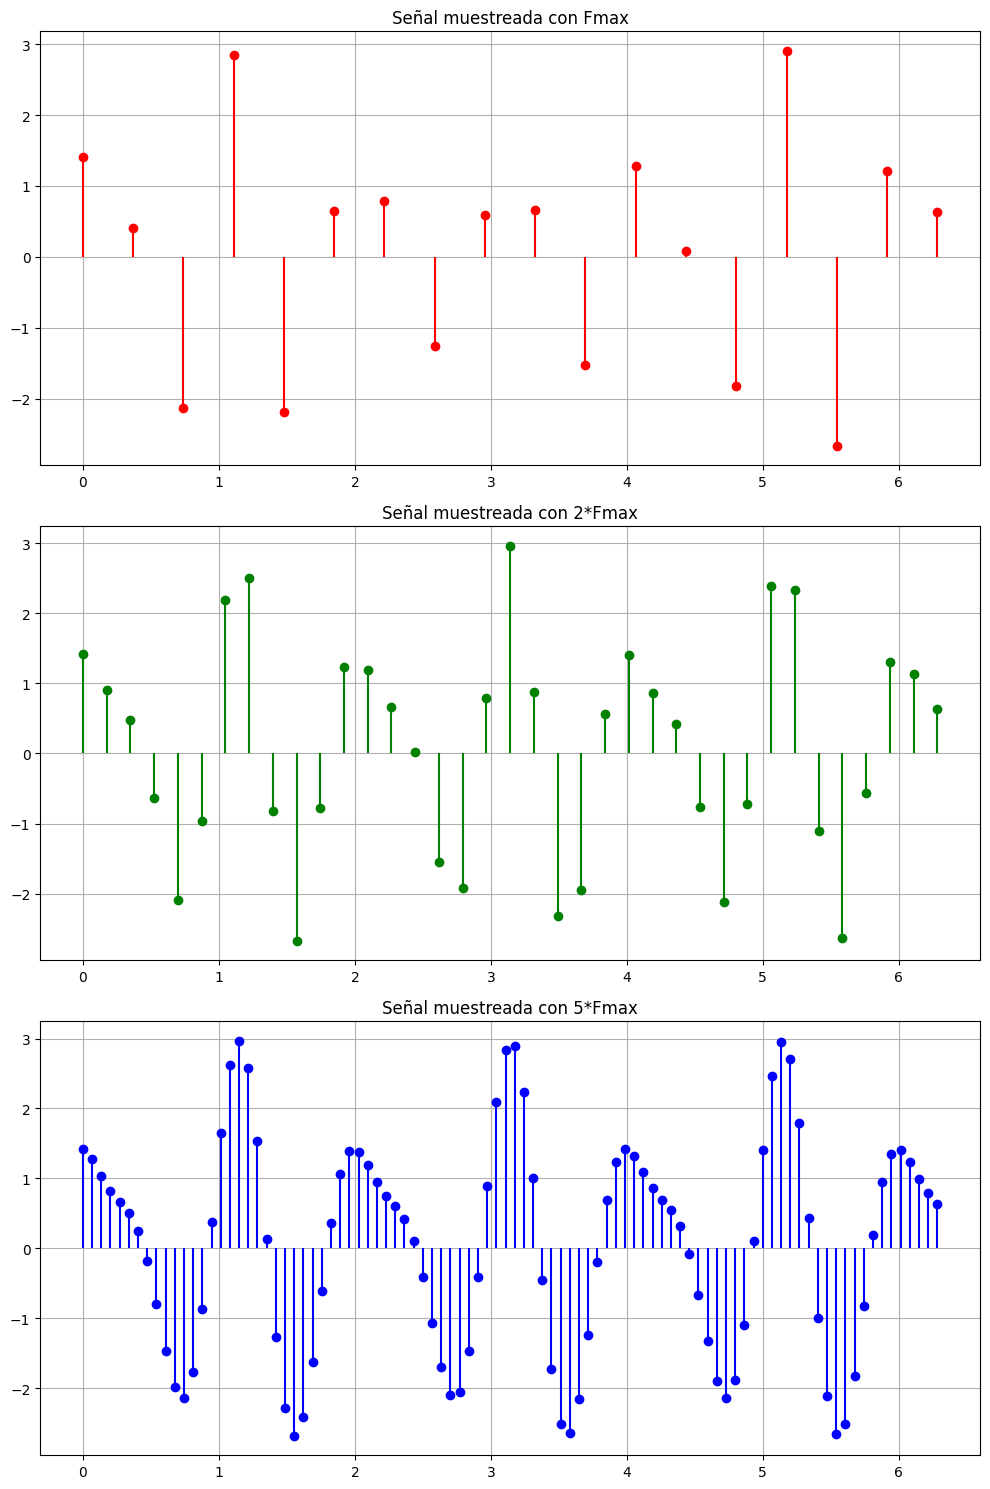

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros de la señal original
A1 = 2
A2 = 1
omega1 = 2 * np.pi
omega2 = 3 * np.pi
phi1 = np.pi / 4
phi2 = np.pi / 2

# Definir el dominio temporal de la señal original
t = np.linspace(0, 2*np.pi, 1000)

# Calcular la señal original
signal = A1 * np.sin(omega1 * t + phi1) + A2 * np.cos(omega2 * t + phi2)

# Definir la frecuencia de muestreo máxima (Fmax)
Fmax = 2 * omega2 / (2 * np.pi)  # La frecuencia angular más alta es omega2

# Muestrear la señal con Fmax
t_sampled_Fmax = np.linspace(0, 2 * np.pi, int(2 * np.pi * Fmax))
signal_sampled_Fmax = A1 * np.sin(omega1 * t_sampled_Fmax + phi1) + A2 * np.cos(omega2 * t_sampled_Fmax + phi2)

# Muestrear la señal con el doble de Fmax
t_sampled_2Fmax = np.linspace(0, 2 * np.pi, int(2 * np.pi * 2 * Fmax))
signal_sampled_2Fmax = A1 * np.sin(omega1 * t_sampled_2Fmax + phi1) + A2 * np.cos(omega2 * t_sampled_2Fmax + phi2)

# Muestrear la señal con 5Fmax
t_sampled_5Fmax = np.linspace(0, 2 * np.pi, int(2 * np.pi * 5 * Fmax))
signal_sampled_5Fmax = A1 * np.sin(omega1 * t_sampled_5Fmax + phi1) + A2 * np.cos(omega2 * t_sampled_5Fmax + phi2)

# Graficar las señales
plt.figure(figsize=(10, 15))

# Gráfico de la señal muestreada con Fmax
plt.subplot(3, 1, 1)
plt.stem(t_sampled_Fmax, signal_sampled_Fmax, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.title('Señal muestreada con Fmax')
plt.grid(True)

# Gráfico de la señal muestreada con 2*Fmax
plt.subplot(3, 1, 2)
plt.stem(t_sampled_2Fmax, signal_sampled_2Fmax, linefmt='g-', markerfmt='go', basefmt=' ')
plt.title('Señal muestreada con 2*Fmax')
plt.grid(True)

# Gráfico de la señal muestreada 5*Fmax
plt.subplot(3, 1, 3)
plt.stem(t_sampled_5Fmax, signal_sampled_5Fmax, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.title('Señal muestreada con 5*Fmax')
plt.grid(True)

plt.tight_layout()
plt.show()


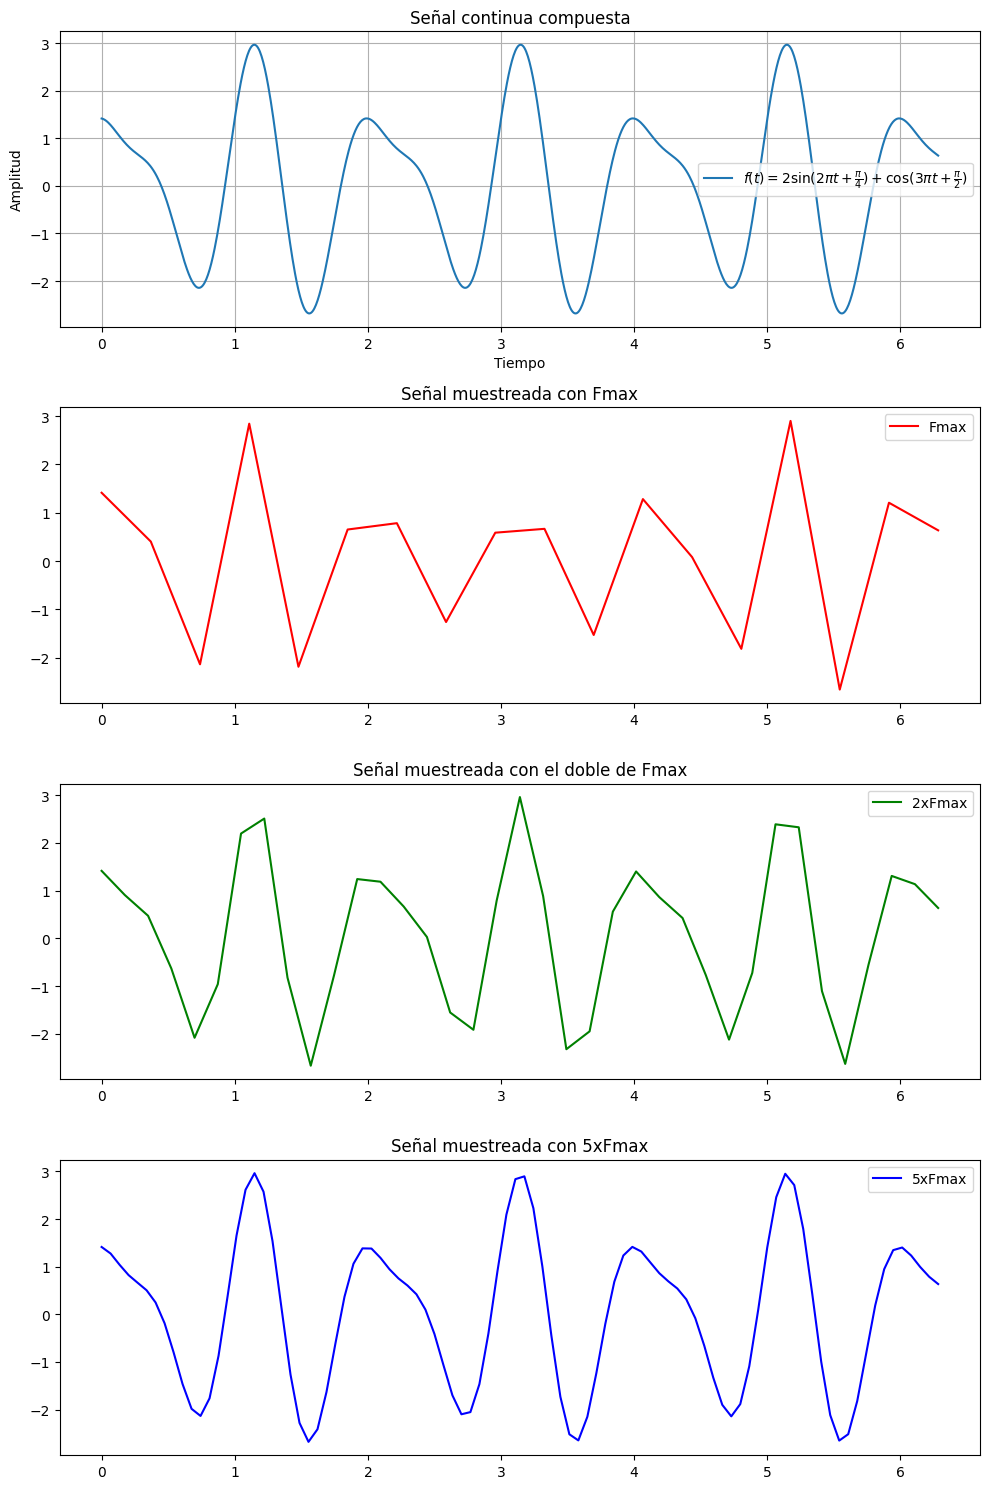

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros de la señal original
A1 = 2
A2 = 1
omega1 = 2 * np.pi
omega2 = 3 * np.pi
phi1 = np.pi / 4
phi2 = np.pi / 2

# Definir el dominio temporal de la señal original
t = np.linspace(0, 2*np.pi, 1000)

# Calcular la señal original
signal = A1 * np.sin(omega1 * t + phi1) + A2 * np.cos(omega2 * t + phi2)

# Definir la frecuencia de muestreo máxima (Fmax)
Fmax = 2 * omega2 / (2 * np.pi)  # La frecuencia angular más alta es omega2

# Muestrear la señal con Fmax
t_sampled_Fmax = np.linspace(0, 2 * np.pi, int(2 * np.pi * Fmax))
signal_sampled_Fmax = A1 * np.sin(omega1 * t_sampled_Fmax + phi1) + A2 * np.cos(omega2 * t_sampled_Fmax + phi2)

# Muestrear la señal con el doble de Fmax
t_sampled_2Fmax = np.linspace(0, 2 * np.pi, int(2 * np.pi * 2 * Fmax))
signal_sampled_2Fmax = A1 * np.sin(omega1 * t_sampled_2Fmax + phi1) + A2 * np.cos(omega2 * t_sampled_2Fmax + phi2)

# Muestrear la señal con 5Fmax
t_sampled_5Fmax = np.linspace(0, 2 * np.pi, int(2 * np.pi * 5 * Fmax))
signal_sampled_5Fmax = A1 * np.sin(omega1 * t_sampled_5Fmax + phi1) + A2 * np.cos(omega2 * t_sampled_5Fmax + phi2)

# Graficar las señales
plt.figure(figsize=(10, 15))

# Gráfico de la señal original
plt.subplot(4, 1, 1)
plt.plot(t, signal, label=r'$f(t) = 2 \sin(2\pi t + \frac{\pi}{4}) + \cos(3\pi t + \frac{\pi}{2})$')
plt.title('Señal continua compuesta')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Gráfico de la señal muestreada con Fmax
plt.subplot(4, 1, 2)
plt.plot(t_sampled_Fmax, signal_sampled_Fmax, 'r-', label='Fmax')
plt.title('Señal muestreada con Fmax')
plt.legend()

# Gráfico de la señal muestreada con 2*Fmax
plt.subplot(4, 1, 3)
plt.plot(t_sampled_2Fmax, signal_sampled_2Fmax, 'g-', label='2xFmax')
plt.title('Señal muestreada con el doble de Fmax')
plt.legend()

# Gráfico de la señal muestreada 5*Fmax
plt.subplot(4, 1, 4)
plt.plot(t_sampled_5Fmax, signal_sampled_5Fmax, 'b-', label='5xFmax')
plt.title('Señal muestreada con 5xFmax')
plt.legend()

plt.tight_layout()
plt.show()


### 3.6 Explica tus hallazgos

El muestreo es el proceso de convertir una señal analógica continua en una versión discreta en el tiempo, capturando su amplitud en puntos específicos. Esto se logra tomando muestras en intervalos regulares. El teorema de Nyquist establece que, para recuperar completamente una señal continua a partir de sus muestras discretas, la frecuencia de muestreo debe ser al menos el doble de la frecuencia máxima presente en la señal continua. En otraa palabras , entonces debe ser muestreada a una frecuencia de 2Fmax o más muestras por segundo para evitar la pérdida de información y permitir una reconstrucción precisa de la señal original.

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py